#### Load in Sensor Data

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
with open('../data/sensor_graph/adj_mx.pkl', 'rb') as f:
    states_data = pickle.load(f)

In [3]:
states_in_the_prediction = ['01','02','04','05','06','08','09','10','12','13','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40',
 '41','42','44','45','46','47','48','49','50','51','53','54','55','56']

#### Week 15 Demo Purpose on Github
**Forecast weeks: week16,week17,week18,week19** -> 
**Forecast date: 2022-06-11, 2022-06-18, 2022-06-25, 2022-07-02**

In [4]:
dfg = pd.read_csv("../data/CDC/truth-Incident Hospitalizations.csv")
dfg['date'] = pd.to_datetime(dfg['date'])
dfg_date_filtered = dfg[(dfg['date'] >= '2022-02-26') & (dfg['date'] <= '2023-01-28')]
dfg_date_filtered_truth_filtered = dfg_date_filtered[dfg_date_filtered['location'].isin(states_in_the_prediction)]
dfg_date_filtered_truth_filtered = dfg_date_filtered_truth_filtered.sort_values(by=['date', 'location'])
states = dfg_date_filtered_truth_filtered['location_name'].unique()

In [5]:
# dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'].isin(pd.date_range('2023-01-21', '2023-01-28', freq='W-SAT'))]['value'].to_numpy() # View the truth data and make sure it's in correct format
# np.resize(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'].isin(pd.date_range('2023-01-21', '2023-01-28', freq='W-SAT'))]['value'].to_numpy(), (4,50)).T

In [6]:
npz = np.load("../data/Result_data/plotweek48result/seed7epo170.npz")
pred = npz['prediction']

In [7]:
dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'] == '2023-01-23'] # check the truth data

Empty DataFrame
Columns: [date, location, location_name, value]
Index: []

#### Quantile Model

In [14]:
def get_plots_quantile_prediction(npz_file_location):
    npz = np.load(npz_file_location)
    pred = npz['prediction']
    
    # truth = npz['truth']
    ground_truth = np.resize(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'] == '2023-01-21']['value'].to_numpy(), (4,50)).T

    # print(pred.shape,truth.shape)
    # if "quantile_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4 ,3)
    #     truth_reshaped = truth.reshape(50, 4)
    # elif "dropout_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4)
    #     truth_reshaped = truth.reshape(50, 4)
    pred_reshaped = pred.reshape(50, 4 ,3)
    pred_actual_ground_truth = np.resize(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'].isin(pd.date_range('2023-01-21', '2023-01-28', freq='W-SAT'))]['value'].to_numpy(), (4,50)).T
    # truth_reshaped = truth.reshape(50, 4)

    x = np.arange(1,5)
    # states = list(states_data[1])
    states = dfg_date_filtered_truth_filtered['location_name'].unique()
    # states = states_in_the_prediction
    for i in range(50):
        plt.plot(x, pred_reshaped[i,:,1] + ground_truth[i,:],label="Prediction", marker = "*")
        plt.plot(x, pred_reshaped[i,:,0]  + ground_truth[i,:],label="Lower Bound", marker = "v")
        plt.plot(x, pred_reshaped[i,:,2]  + ground_truth[i,:],label="Upper Bound", marker = "^")
        plt.plot(x, ground_truth[i,:],label="Truth Used for Prediction", marker = ".")
        plt.plot(np.arange(1,3), pred_actual_ground_truth[i,:2],label="Truth", marker = "o")
        plt.title(states[i])
        plt.xlabel("Num of Weeks Ahead")
        plt.ylabel("Number of Flu Cases")
        plt.legend(loc='best')
        # plt.fill_between(x, pred_reshaped[i,:,0] + ground_truth[i,:],pred_reshaped[i,:,2] + ground_truth[i,:],color = 'green',alpha = 0.2)
        plt.fill_between(x, pred_reshaped[i,:,0]  + ground_truth[i,:],pred_reshaped[i,:,2]  + ground_truth[i,:],color = 'green',alpha = 0.2)
        plt.show()

In [15]:
np.resize(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'].isin(pd.date_range('2023-01-07', '2023-01-14', freq='W-SAT'))]['value'].to_numpy(), (4,50)).T[1,:2]

array([32,  8])

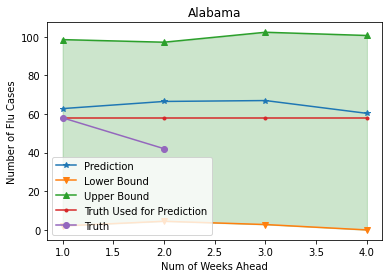

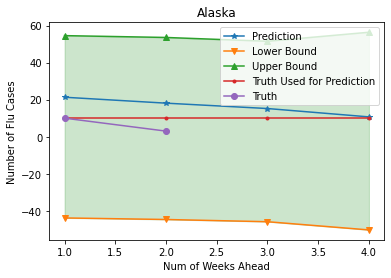

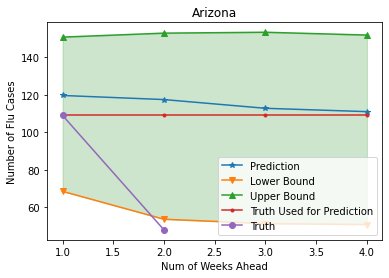

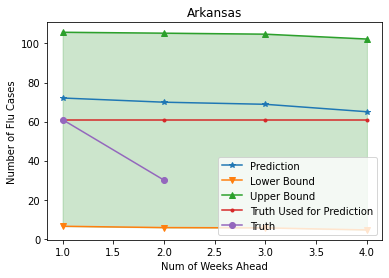

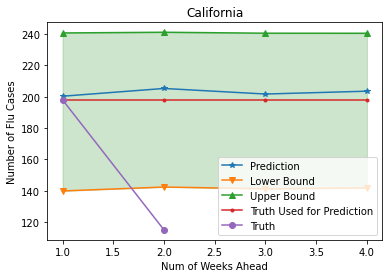

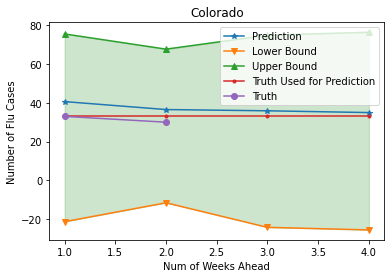

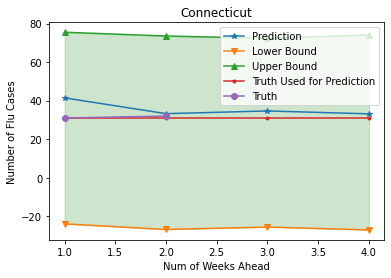

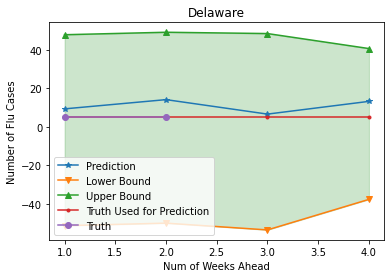

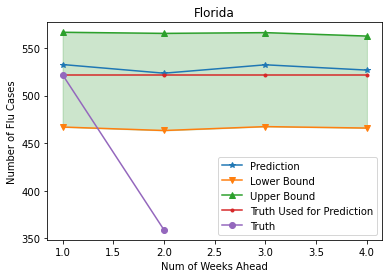

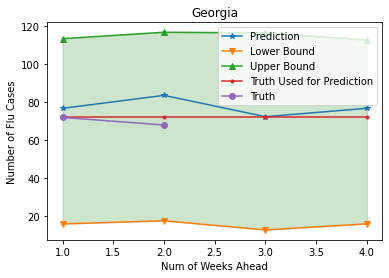

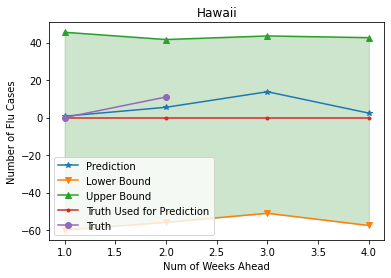

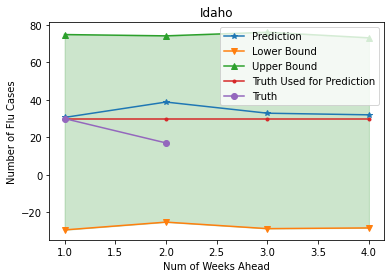

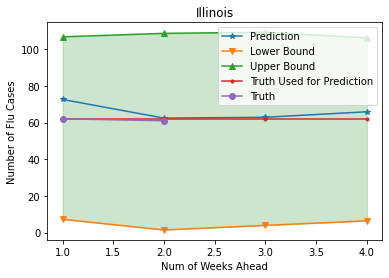

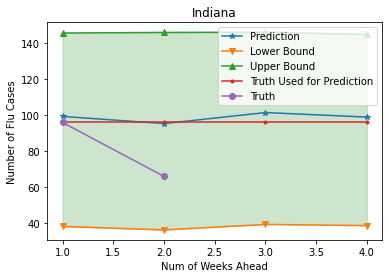

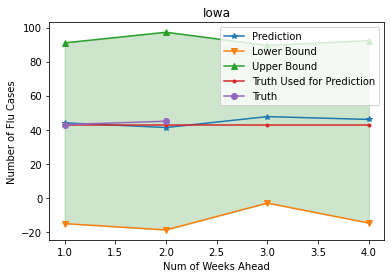

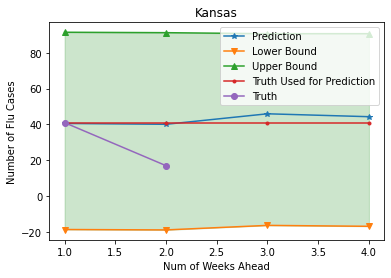

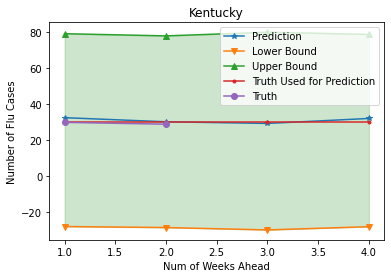

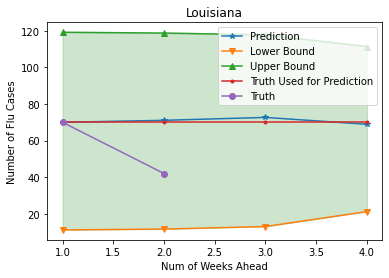

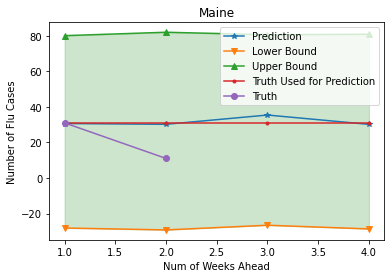

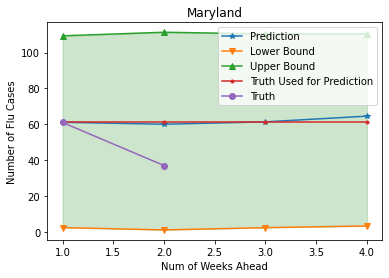

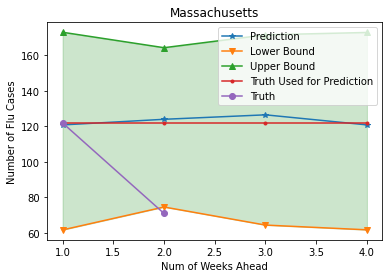

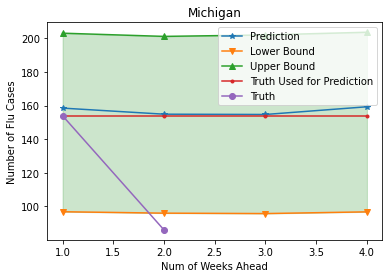

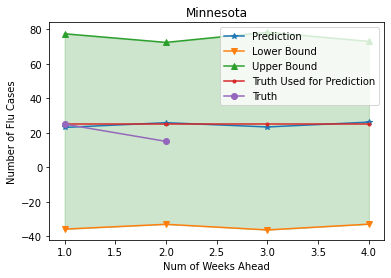

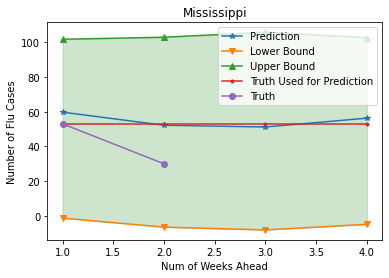

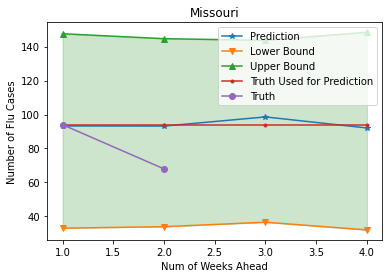

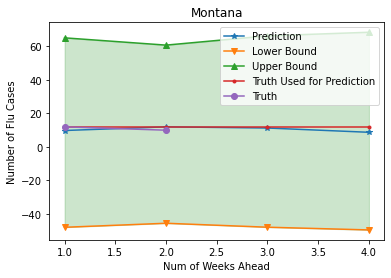

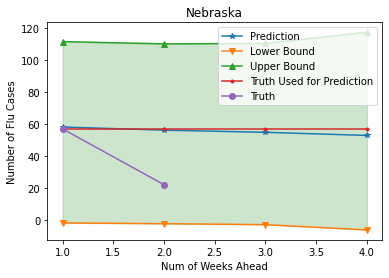

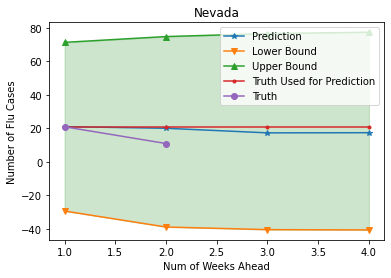

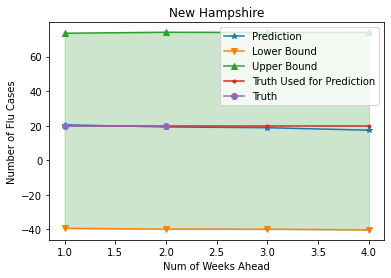

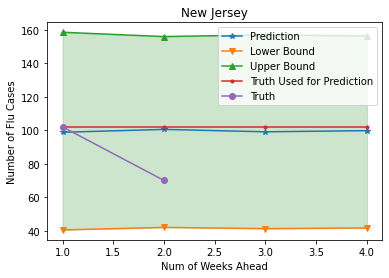

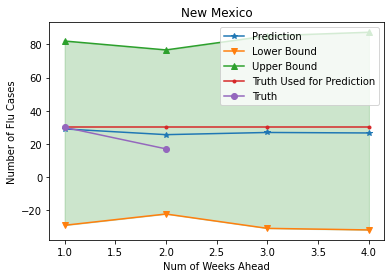

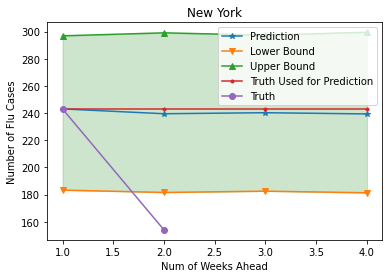

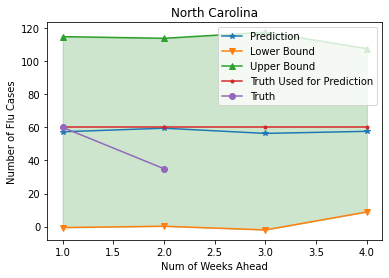

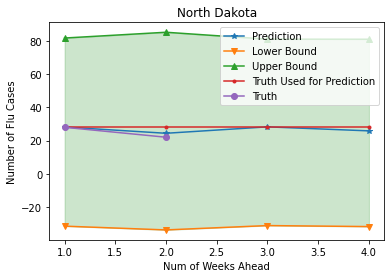

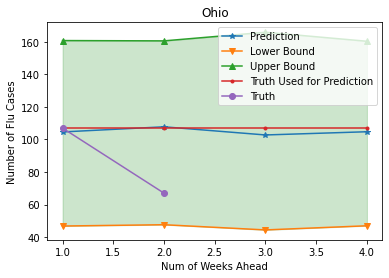

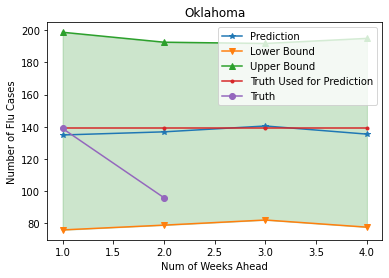

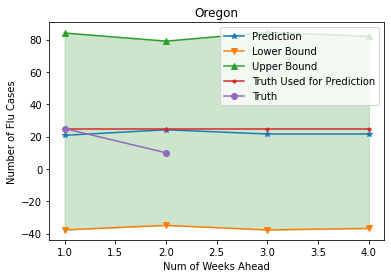

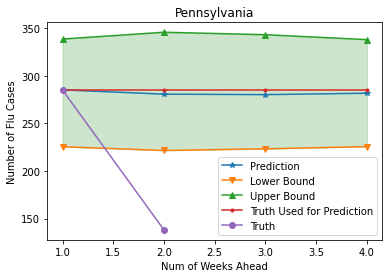

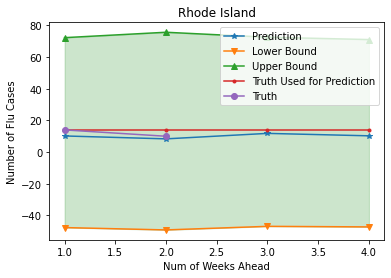

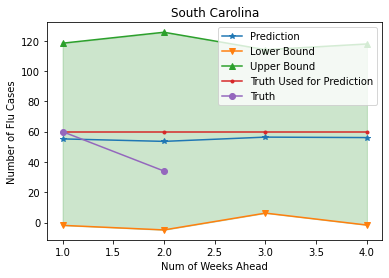

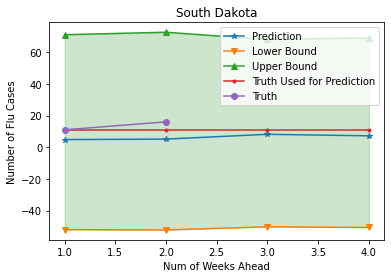

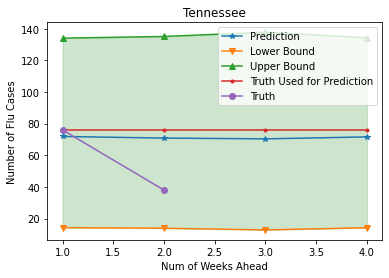

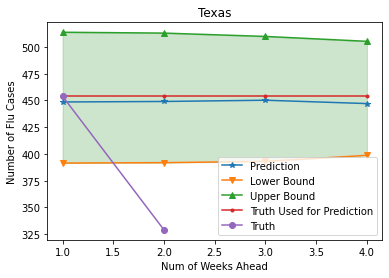

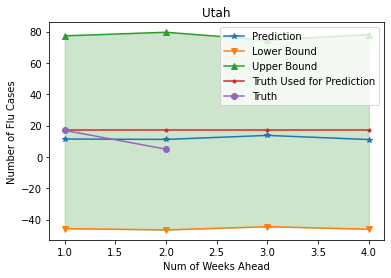

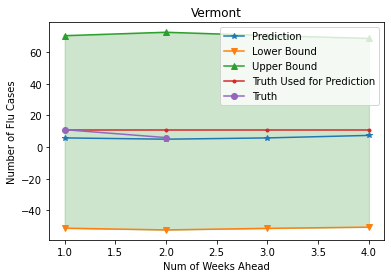

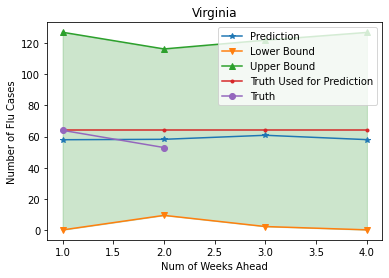

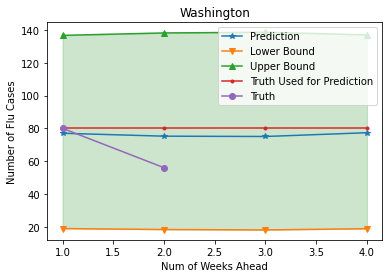

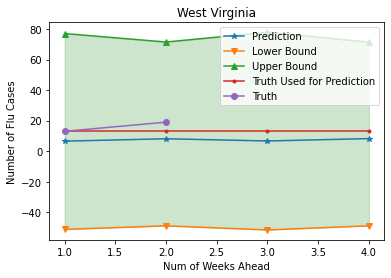

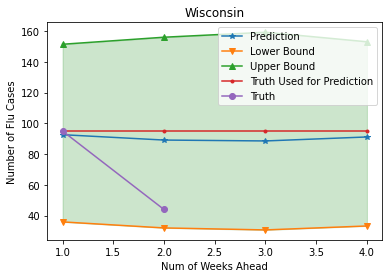

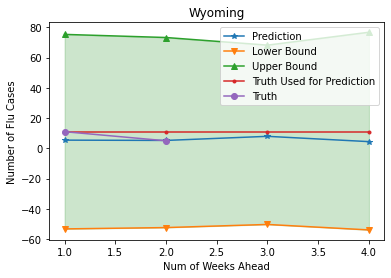

In [18]:
get_plots_quantile_prediction("../data/Result_data/plotweek22result/seed7epo62.npz")

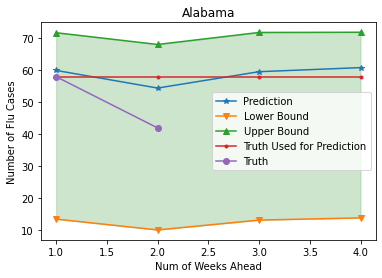

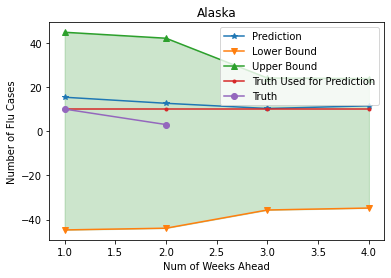

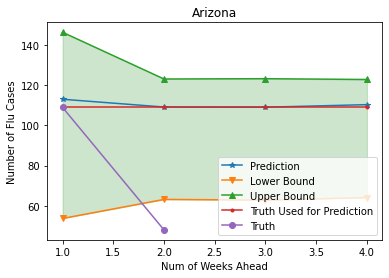

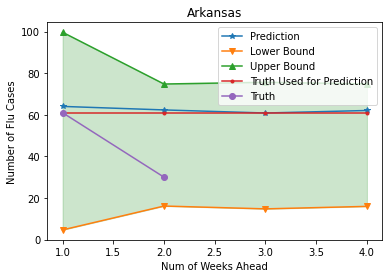

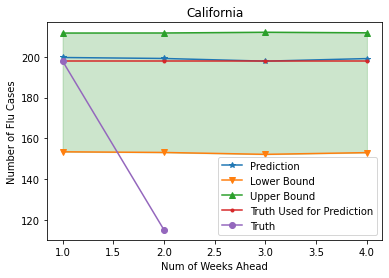

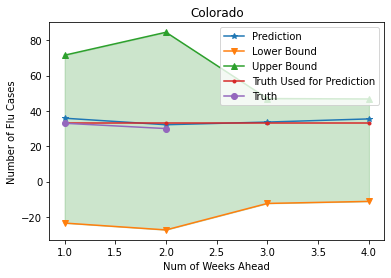

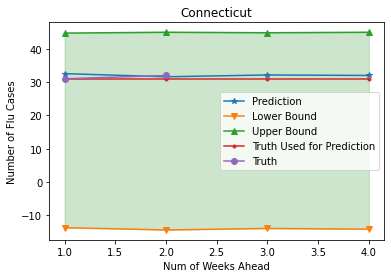

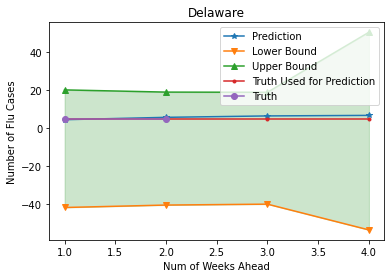

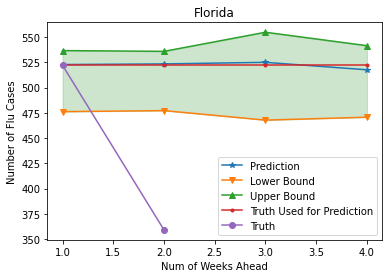

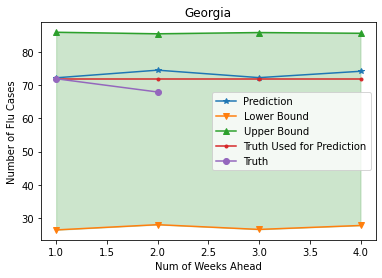

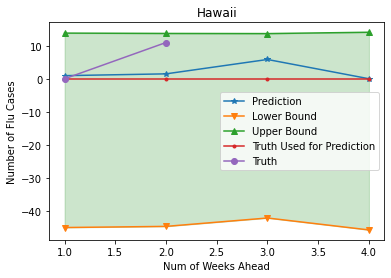

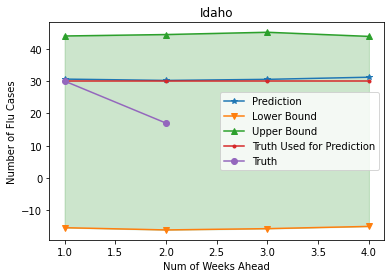

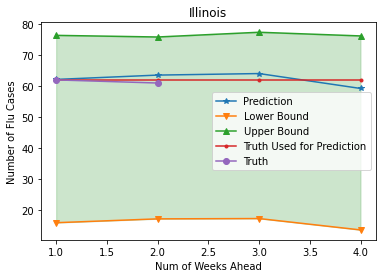

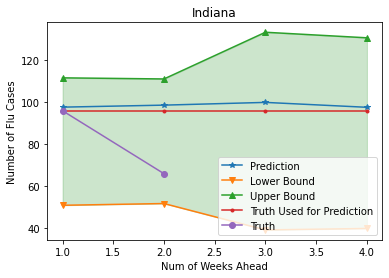

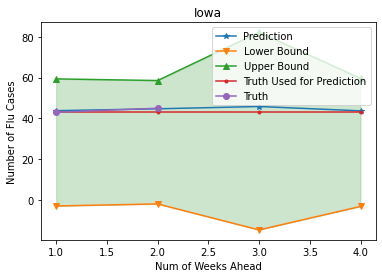

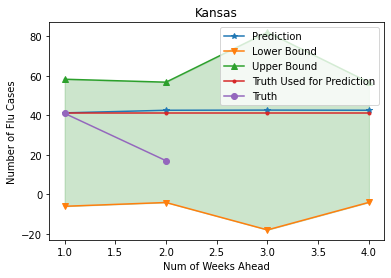

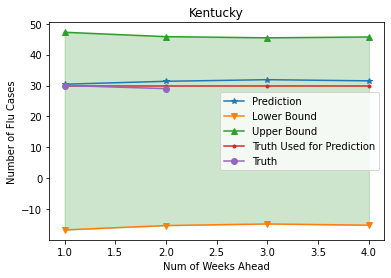

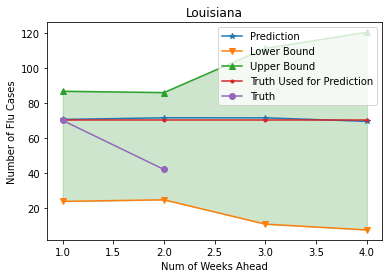

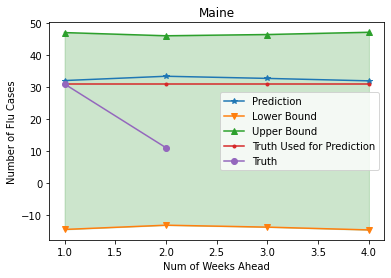

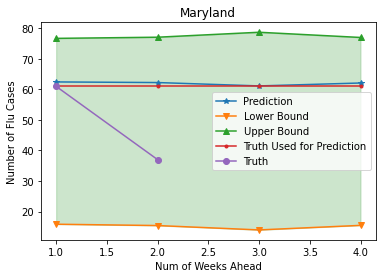

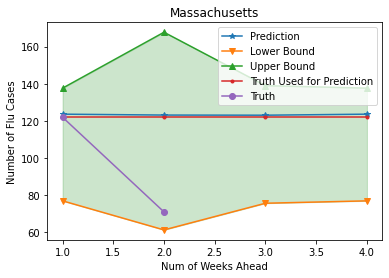

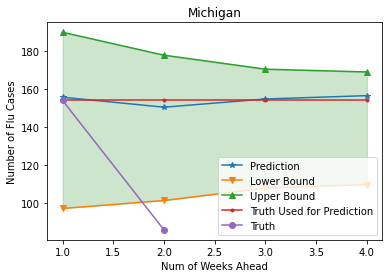

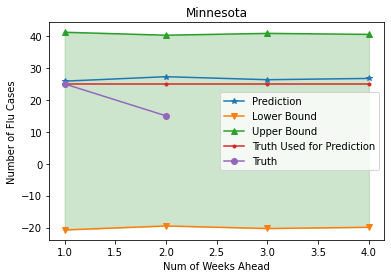

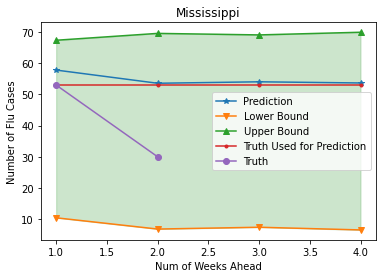

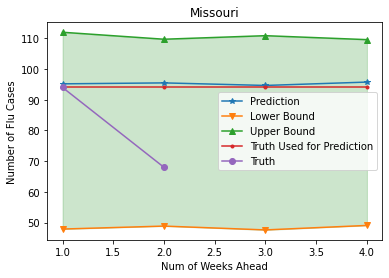

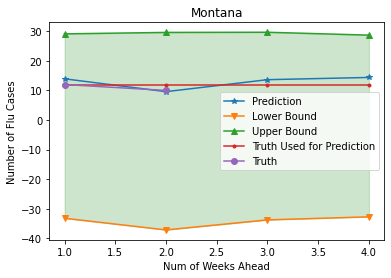

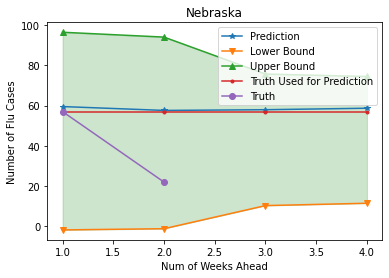

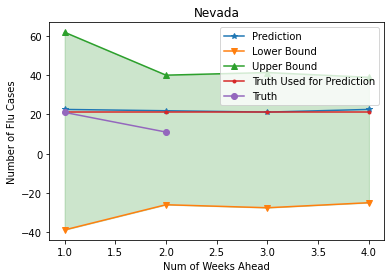

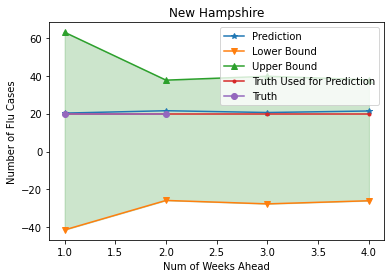

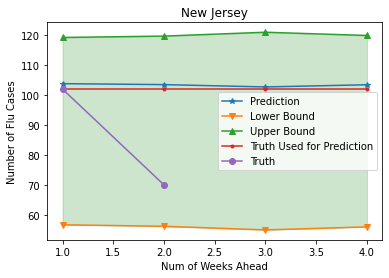

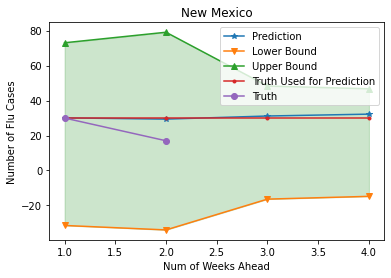

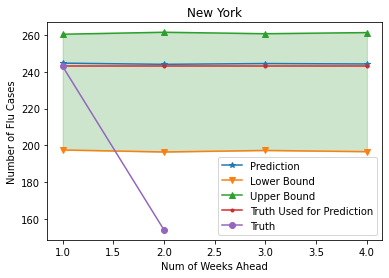

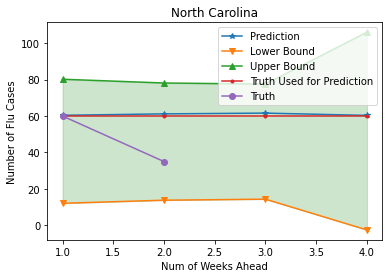

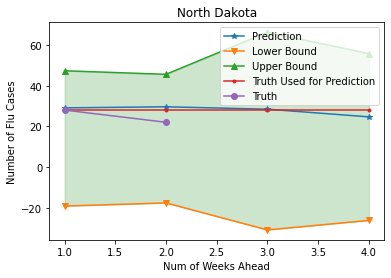

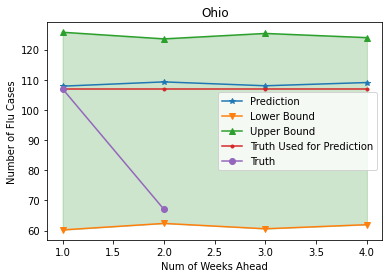

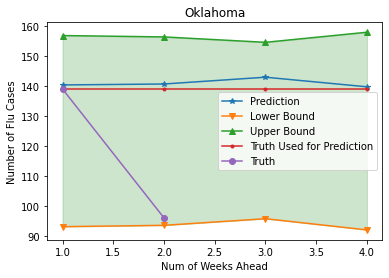

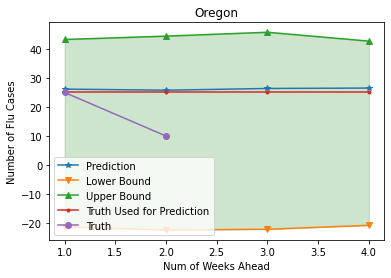

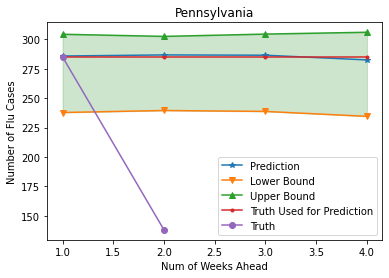

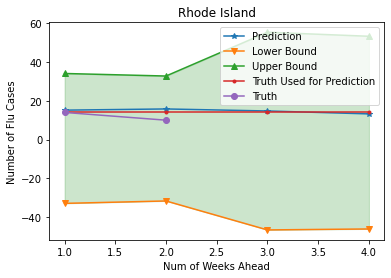

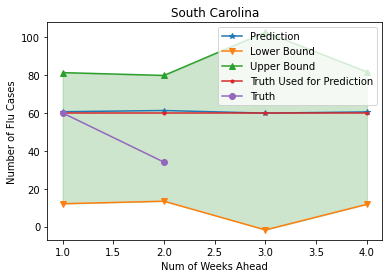

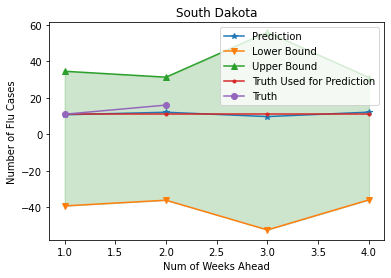

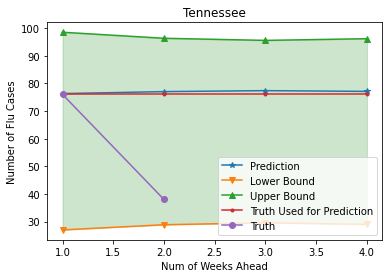

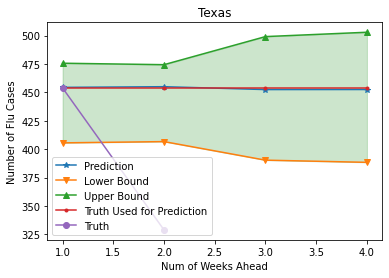

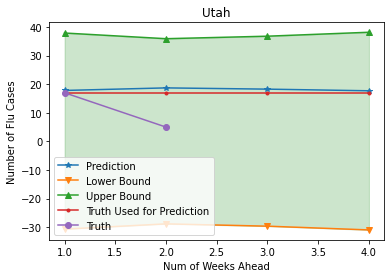

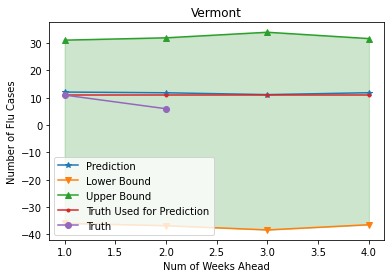

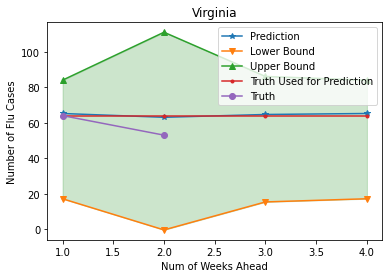

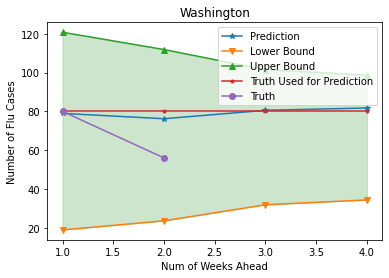

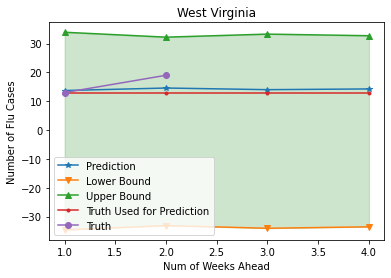

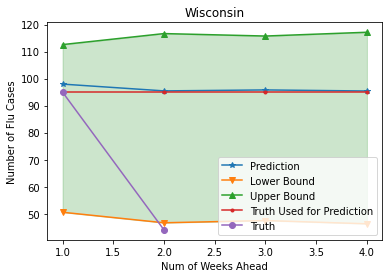

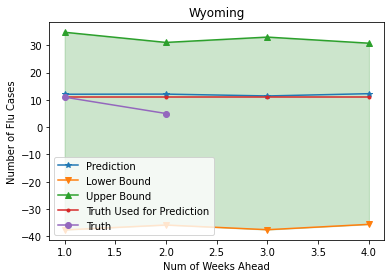

In [19]:
get_plots_quantile_prediction("../data/Result_data/plotweek48result/seed7epo170.npz")

# Compare with GLEAM

In [87]:
import math

In [8]:
npz = np.load("../data/Result_data/plotweek48result/seed7epo170.npz")
pred = npz['prediction']
npz_no_interpolation = np.load("../data/Result_data/plotweek22result/seed7epo62.npz")
pred_no_interpolation = npz_no_interpolation['prediction']
GLEAM_01_23_pd = pd.read_csv("../data/GLEAM/2023-01-23-MOBS-GLEAM_FLUH.csv")

In [9]:
GLEAM_01_23_pd_filter = GLEAM_01_23_pd[(GLEAM_01_23_pd['target'] == '1 wk ahead inc flu hosp') & (GLEAM_01_23_pd['quantile'] == 0.5) & (GLEAM_01_23_pd['location'].isin(states_in_the_prediction))][['location','value']]

# groundtruth_2022_12_31 = np.array(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'] == '2022-12-31']['value'])
groundtruth_2023_01_21 = np.array(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'] == '2023-01-21']['value'])
groundtruth_2023_01_28 = np.array(dfg_date_filtered_truth_filtered[dfg_date_filtered_truth_filtered['date'] == '2023-01-28']['value'])

deep_gleam_pred_01_21 = (pred[0][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2023_01_21
deep_gleam_pred_01_21_no_interpolation = (pred_no_interpolation[0][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2023_01_21

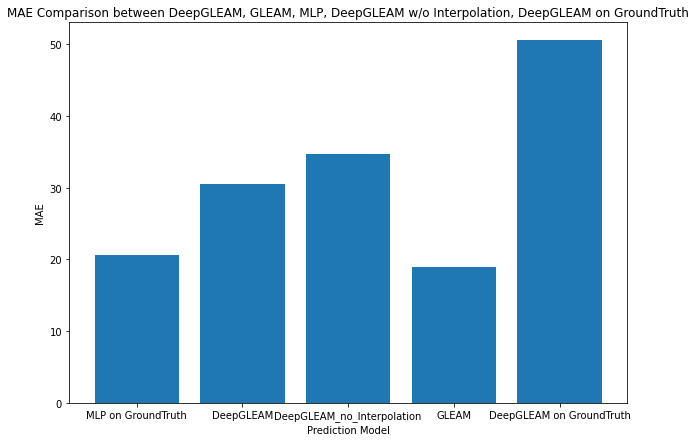

In [10]:
# Figure Size

# mae_lst = [np.mean(np.abs(deep_gleam_pred_01_21 - groundtruth_2023_01_28)), np.mean(np.abs(groundtruth_2023_01_28 - GLEAM_01_23_pd_filter['value'].to_numpy()))]
# name_lst = ['DeepGLEAM', 'GLEAM']
# fig, ax = plt.subplots()
# width = 0.75
# ind = np.arange(len(mae_lst))
 
# ax.barh(ind, mae_lst, width, color = "green")
 
# for i, v in enumerate(mae_lst):
#     ax.text(v + 3, i + .25, str(v),
#             color = 'blue', fontweight = 'bold')

fig = plt.figure(figsize =(10, 7))
mae_lst = [20.660641059875488, np.mean(np.abs(deep_gleam_pred_01_21 - groundtruth_2023_01_28)), np.mean(np.abs(deep_gleam_pred_01_21_no_interpolation - groundtruth_2023_01_28)), np.mean(np.abs(groundtruth_2023_01_28 - GLEAM_01_23_pd_filter['value'].to_numpy())), 50.54]
name_lst = ['MLP on GroundTruth','DeepGLEAM', 'DeepGLEAM_no_Interpolation','GLEAM', 'DeepGLEAM on GroundTruth']
# Horizontal Bar Plot
plt.bar(name_lst,mae_lst)
plt.xlabel("Prediction Model")
plt.ylabel("MAE")
plt.title("MAE Comparison between DeepGLEAM, GLEAM, MLP, DeepGLEAM w/o Interpolation, DeepGLEAM on GroundTruth")
# Show Plot
plt.show()

In [26]:
print(np.mean(np.abs(deep_gleam_pred_01_21 - groundtruth_2023_01_28)))
print(np.mean(np.abs(deep_gleam_pred_01_21_no_interpolation - groundtruth_2023_01_28)))
print(np.mean(np.abs(groundtruth_2023_01_28 - GLEAM_01_23_pd_filter['value'].to_numpy())))

30.532924737930298
34.64139022827148
18.984057145383236


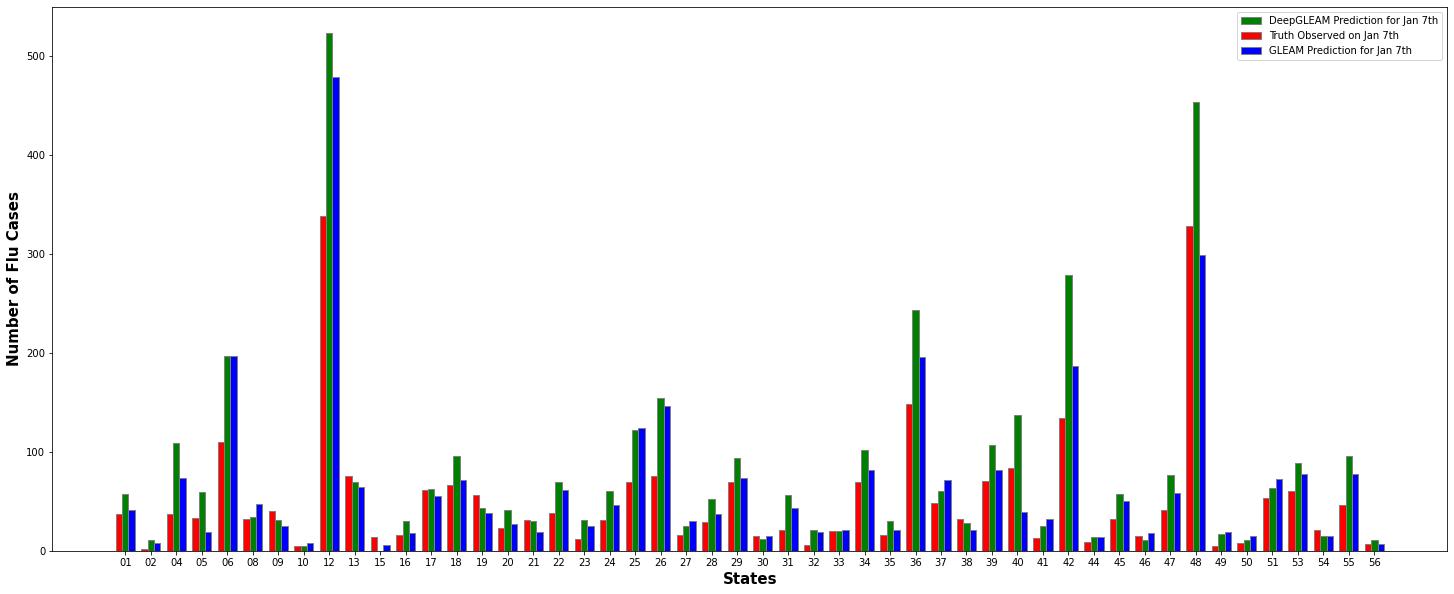

In [35]:
barWidth = 0.25
fig = plt.subplots(figsize =(25, 10))
br1 = np.arange(len(groundtruth_2023_01_28))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br2, deep_gleam_pred_01_21, color ='g', width = barWidth,
        edgecolor ='grey', label ='DeepGLEAM Prediction for Jan 7th')
plt.bar(br1, groundtruth_2023_01_28, color ='r', width = barWidth,
        edgecolor ='grey', label ='Truth Observed on Jan 7th')
plt.bar(br3, GLEAM_01_23_pd_filter['value'].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='GLEAM Prediction for Jan 7th')

 
# Adding Xticks
plt.xlabel('States', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Flu Cases', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(groundtruth_2023_01_28))],
        states_in_the_prediction)

plt.legend()
plt.show()

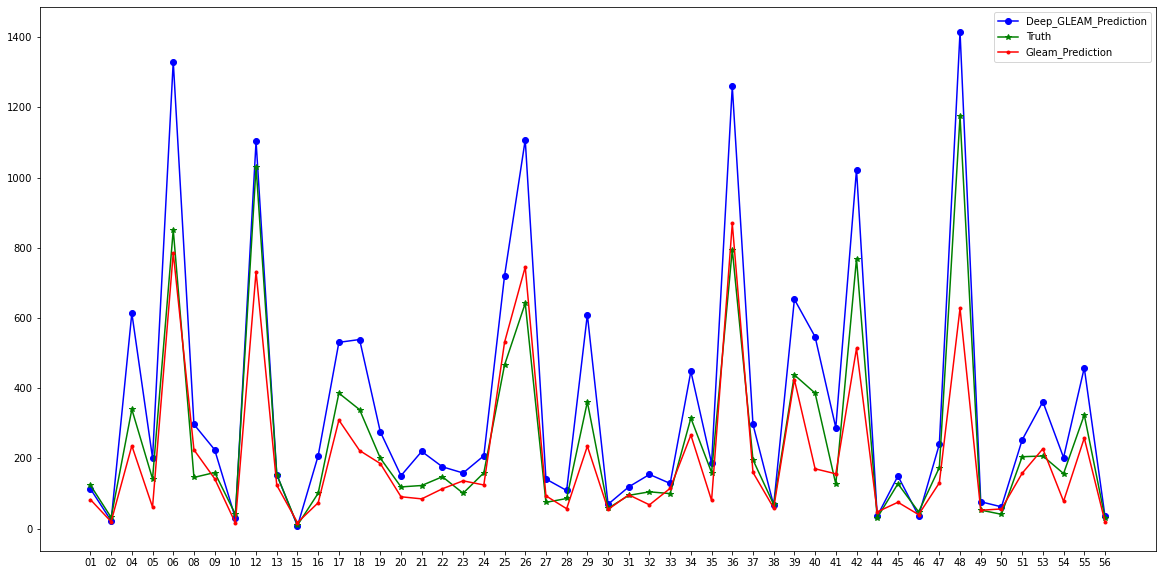

In [169]:
plt.figure(figsize=(20, 10))
display(
    plt.plot(states_in_the_prediction,deep_gleam_pred_01_07,label="Deep_GLEAM_Prediction",color='blue',marker='o'),
plt.plot(states_in_the_prediction,groundtruth_2023_01_07,label="Truth",color='green',marker='*'),
plt.plot(states_in_the_prediction,GLEAM_01_02_pd_filter['value'].to_numpy(),label="Gleam_Prediction",color='red',marker='.'),
plt.legend())

In [105]:
GLEAM_01_02_pd_filter_2weeks = GLEAM_01_02_pd[(GLEAM_01_02_pd['target'] == '2 wk ahead inc flu hosp') & (GLEAM_01_02_pd['quantile'] == 0.5) & (GLEAM_01_02_pd['location'].isin(states_in_the_prediction))][['location','value']]

In [108]:
deep_gleam_pred_01_02_2weeks = (pred[1][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2022_12_31

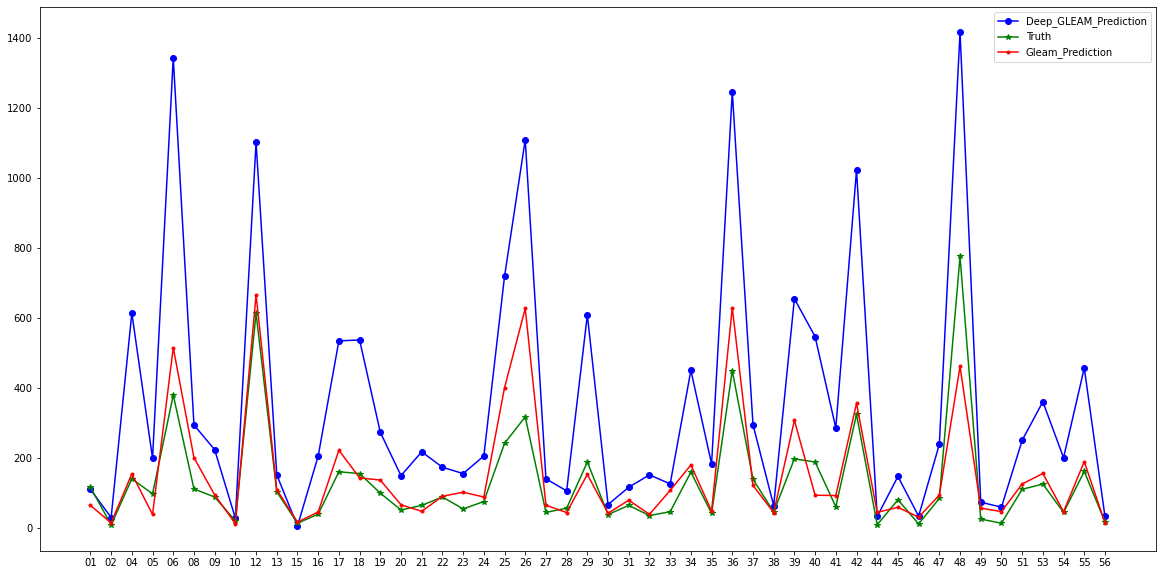

In [109]:
plt.figure(figsize=(20, 10))
display(plt.plot(states_in_the_prediction,deep_gleam_pred_01_02_2weeks,label="Deep_GLEAM_Prediction",color='blue',marker='o'),
plt.plot(states_in_the_prediction,groundtruth_2023_01_14,label="Truth",color='green',marker='*'),
plt.plot(states_in_the_prediction,GLEAM_01_02_pd_filter_2weeks['value'].to_numpy(),label="Gleam_Prediction",color='red',marker='.'),
plt.legend())

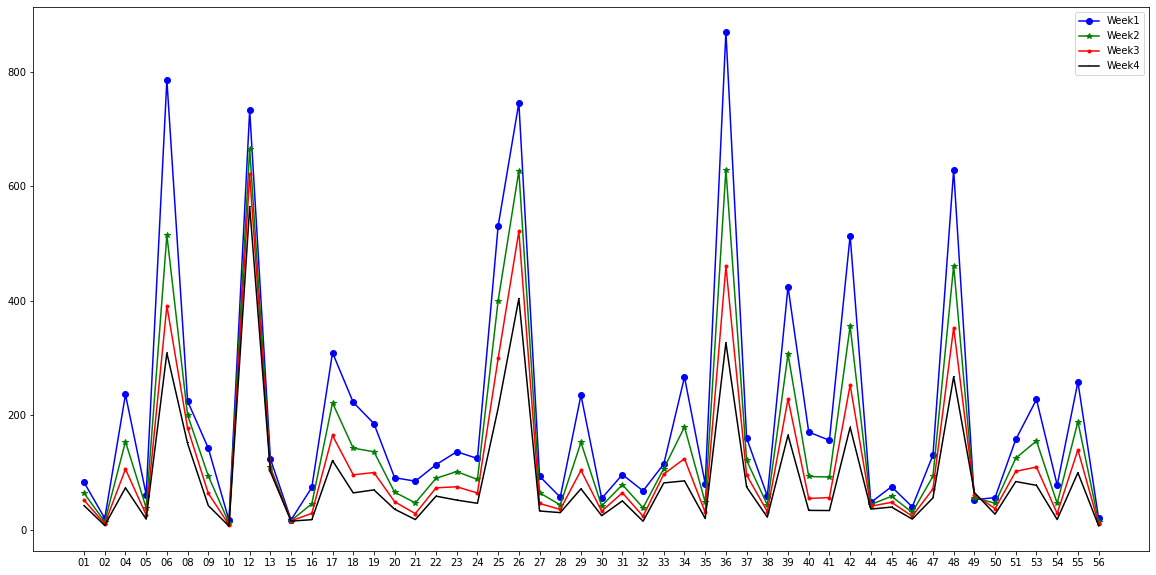

In [69]:
plt.figure(figsize=(20, 10))
display(plt.plot(states_in_the_prediction,  GLEAM_01_02_pd[(GLEAM_01_02_pd['target'] == '1 wk ahead inc flu hosp') & (GLEAM_01_02_pd['quantile'] == 0.5) & (GLEAM_01_02_pd['location'].isin(states_in_the_prediction))][['location','value']]['value'],label="Week1",color='blue',marker='o'),
plt.plot(states_in_the_prediction,  GLEAM_01_02_pd[(GLEAM_01_02_pd['target'] == '2 wk ahead inc flu hosp') & (GLEAM_01_02_pd['quantile'] == 0.5) & (GLEAM_01_02_pd['location'].isin(states_in_the_prediction))][['location','value']]['value'],label="Week2",color='green',marker='*'),
plt.plot(states_in_the_prediction,  GLEAM_01_02_pd[(GLEAM_01_02_pd['target'] == '3 wk ahead inc flu hosp') & (GLEAM_01_02_pd['quantile'] == 0.5) & (GLEAM_01_02_pd['location'].isin(states_in_the_prediction))][['location','value']]['value'],label="Week3",color='red',marker='.'),
plt.plot(states_in_the_prediction,  GLEAM_01_02_pd[(GLEAM_01_02_pd['target'] == '4 wk ahead inc flu hosp') & (GLEAM_01_02_pd['quantile'] == 0.5) & (GLEAM_01_02_pd['location'].isin(states_in_the_prediction))][['location','value']]['value'],label="Week4",color='black',marker=','),
plt.legend())

In [122]:

npz = np.load("/Users/xiangyikong/Desktop/Flu_preprocess/quantile_model_for_flu/plotweek31_shuffledresult/seed7epo176.npz")
pred = npz['prediction']

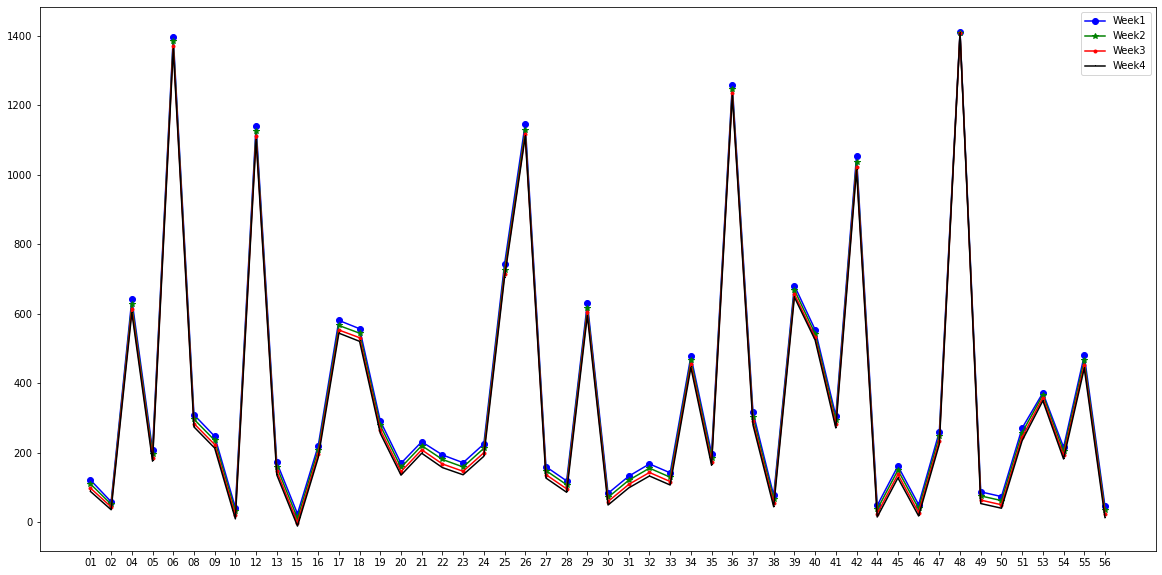

In [123]:
plt.figure(figsize=(20, 10))
display(plt.plot(states_in_the_prediction, (pred[0][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2022_12_31,label="Week1",color='blue',marker='o'),
plt.plot(states_in_the_prediction, (pred[1][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2022_12_31,label="Week2",color='green',marker='*'),
plt.plot(states_in_the_prediction, (pred[2][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2022_12_31,label="Week3",color='red',marker='.'),
plt.plot(states_in_the_prediction, (pred[3][0][:,np.array([False, True, False,])]).flatten() + groundtruth_2022_12_31,label="Week4",color='black',marker=','),
plt.legend())

In [76]:
(pred[0][0][:,np.array([False, True, False,])]).flatten()

array([-5.4899712e+00, -4.4834976e+00, -1.5163733e+01, -8.4975204e+00,
        1.1693344e+01, -6.1482811e+00, -2.3593941e+00, -4.3052673e+00,
       -5.1209412e+00, -5.2385712e+00, -4.2914391e+00, -7.4050179e+00,
        2.5518227e+00, -9.9000168e+00, -4.5190506e+00, -3.6656265e+00,
       -5.9069557e+00, -7.1038818e+00, -4.2607079e+00, -4.7121277e+00,
       -8.3344288e+00, -3.1355946e+01, -2.2021103e+00, -6.2140503e+00,
       -1.4989092e+01, -4.5858002e+00, -4.1803207e+00, -5.1280632e+00,
       -7.0648518e+00,  2.1625443e+00, -6.9314651e+00,  1.3020905e+01,
       -4.5245056e+00, -4.4908524e+00, -1.2176514e-02, -2.0267696e+01,
       -4.0679092e+00, -5.8815842e+00, -4.4981003e+00, -7.8165817e+00,
       -3.2612801e+00, -4.6525078e+00, -2.0083214e+01, -6.4275589e+00,
       -5.7400627e+00, -5.1165466e+00,  5.2888756e+00, -9.2497997e+00,
       -5.5579185e+00, -4.8100166e+00], dtype=float32)

In [74]:
pred[0]

array([[[-1.56142700e+02, -5.48997116e+00,  1.93388092e+02],
        [-8.98040009e+01, -4.48349762e+00,  1.14589867e+02],
        [-2.76799316e+02, -1.51637325e+01,  2.55154297e+02],
        [-2.07598694e+02, -8.49752045e+00,  2.27261627e+02],
        [-2.45656342e+02,  1.16933441e+01,  2.45686890e+02],
        [-1.57666733e+02, -6.14828110e+00,  1.92715759e+02],
        [-1.73773865e+02, -2.35939407e+00,  2.15689941e+02],
        [-1.58104309e+02, -4.30526733e+00,  1.99582428e+02],
        [-1.90333984e+02, -5.12094116e+00,  2.11305573e+02],
        [-1.61342468e+02, -5.23857117e+00,  2.00126068e+02],
        [-1.57067535e+02, -4.29143906e+00,  1.90694580e+02],
        [-1.93596924e+02, -7.40501785e+00,  2.21057922e+02],
        [-1.68924377e+02,  2.55182266e+00,  1.96677856e+02],
        [-2.22098419e+02, -9.90001678e+00,  2.31350433e+02],
        [-1.55144012e+02, -4.51905060e+00,  1.95269562e+02],
        [-1.63910522e+02, -3.66562653e+00,  2.06087952e+02],
        [-1.57389832e+02

In [75]:
pred[1]

array([[[-375.3448    ,  -14.04208   ,  351.86838   ],
        [-217.03766   ,   -9.389603  ,  209.96133   ],
        [-432.38174   ,  -25.235004  ,  353.32275   ],
        [-406.1122    ,  -19.08132   ,  361.42258   ],
        [-363.46936   ,   -3.3109436 ,  301.634     ],
        [-372.30997   ,  -14.72426   ,  347.6961    ],
        [-383.04953   ,  -13.457451  ,  357.50507   ],
        [-376.4053    ,  -13.501459  ,  354.5487    ],
        [-369.91876   ,  -15.58872   ,  336.66602   ],
        [-378.95636   ,  -14.347322  ,  354.81262   ],
        [-349.25717   ,  -13.844805  ,  325.67572   ],
        [-397.88724   ,  -17.599419  ,  360.77625   ],
        [-342.3052    ,   -9.364721  ,  318.95813   ],
        [-407.7653    ,  -20.627043  ,  355.8407    ],
        [-372.90375   ,  -13.305677  ,  351.67334   ],
        [-377.86697   ,  -13.736345  ,  354.7038    ],
        [-375.31183   ,  -14.720781  ,  352.0326    ],
        [-374.42224   ,  -15.248384  ,  348.92117   ],
        [-

In [ ]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

In [ ]:
def get_plots_quantile_demo_9_states(npz_file_location,test_sets):
    npz = np.load(npz_file_location)
    pred = npz['prediction'].transpose((1,0,2,3))[test_sets]
    # pred = npz['prediction']

    truth = npz['truth'].transpose((1,0,2))[test_sets]
    # ground_truth = np.resize(dfg_date_filtered_truth_filtered['value'].to_numpy(), (4,50)).T
    # print(pred.shape,truth.shape)
    # if "quantile_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4 ,3)
    #     truth_reshaped = truth.reshape(50, 4)
    # elif "dropout_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4)
    #     truth_reshaped = truth.reshape(50, 4)
    pred_reshaped = pred.reshape(50, 4 ,3)
    truth_reshaped = truth.reshape(50, 4)

    x = np.arange(1,5).astype(str)
    states = list(states_data[1])
    states = dfg_date_filtered_truth_filtered['location_name'].unique()
    for i in range(50):
        plt.plot(x, pred_reshaped[i,:,1],label="Prediction", marker = "*")
        plt.plot(x, pred_reshaped[i,:,0],label="Lower Bound", marker = "v")
        plt.plot(x, pred_reshaped[i,:,2],label="Upper Bound", marker = "^")
        plt.plot(x, truth_reshaped[i,:],label="Truth", marker = ".")
        plt.title(states[i])
        plt.xlabel("Num of Weeks Ahead")
        plt.ylabel("Residual between Predicted and True")
        plt.legend(loc='best')
        plt.fill_between(x, pred_reshaped[i,:,0],pred_reshaped[i,:,2] ,color = 'green',alpha = 0.2)
        plt.show()

In [13]:
def get_plots_quantile(npz_file_location,test_sets):
    npz = np.load(npz_file_location)
    pred = npz['prediction'].transpose((1,0,2,3))[test_sets]
    # pred = npz['prediction']

    truth = npz['truth'].transpose((1,0,2))[test_sets]
    # ground_truth = np.resize(dfg_date_filtered_truth_filtered['value'].to_numpy(), (4,50)).T
    # print(pred.shape,truth.shape)
    # if "quantile_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4 ,3)
    #     truth_reshaped = truth.reshape(50, 4)
    # elif "dropout_model" in npz_file_location:
    #     pred_reshaped = pred.reshape(50, 4)
    #     truth_reshaped = truth.reshape(50, 4)
    pred_reshaped = pred.reshape(50, 4 ,3)
    truth_reshaped = truth.reshape(50, 4)

    x = np.arange(1,5).astype(str)
    states = list(states_data[1])
    states = dfg_date_filtered_truth_filtered['location_name'].unique()
    for i in range(50):
        plt.plot(x, pred_reshaped[i,:,1],label="Prediction", marker = "*")
        plt.plot(x, pred_reshaped[i,:,0],label="Lower Bound", marker = "v")
        plt.plot(x, pred_reshaped[i,:,2],label="Upper Bound", marker = "^")
        plt.plot(x, truth_reshaped[i,:],label="Truth", marker = ".")
        plt.title(states[i])
        plt.xlabel("Num of Weeks Ahead")
        plt.ylabel("Residual between Predicted and True")
        plt.legend(loc='best')
        plt.fill_between(x, pred_reshaped[i,:,0],pred_reshaped[i,:,2] ,color = 'green',alpha = 0.2)
        plt.show()

#### Unshuffled

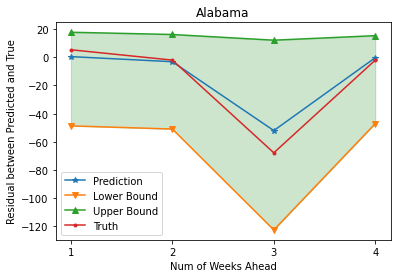

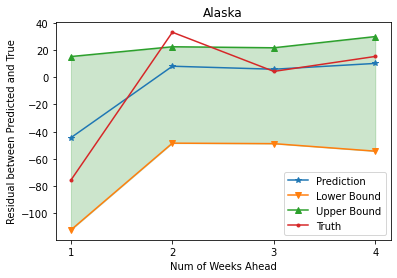

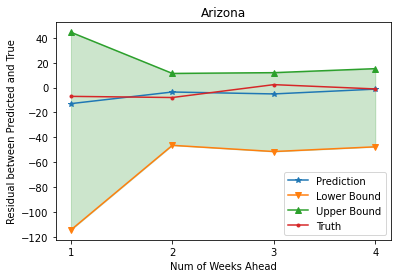

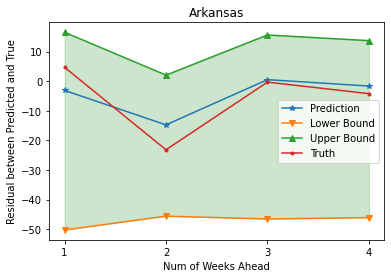

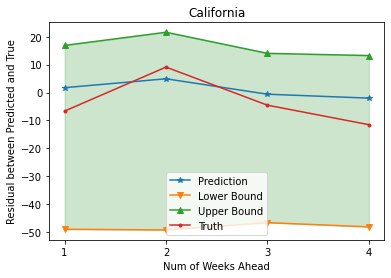

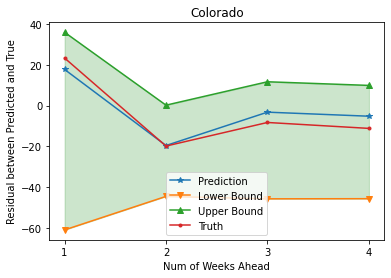

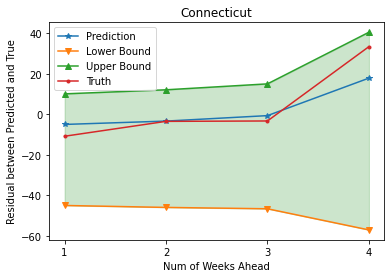

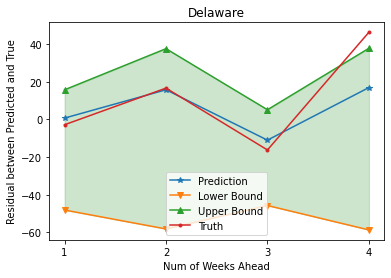

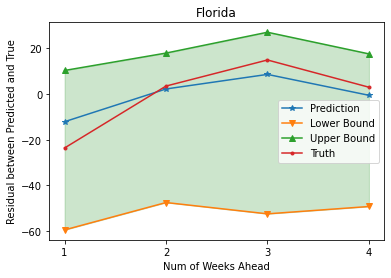

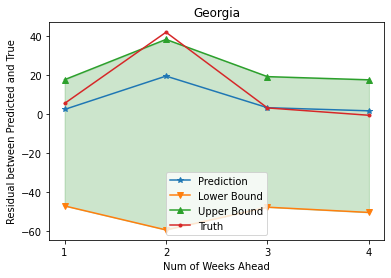

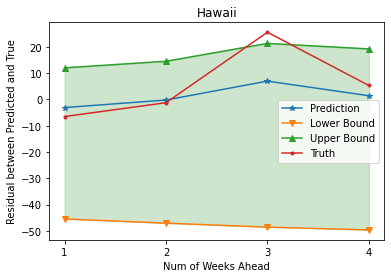

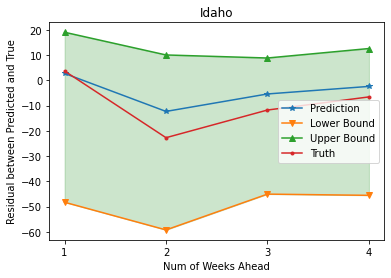

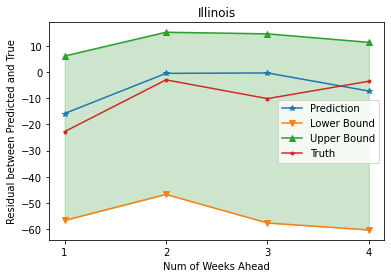

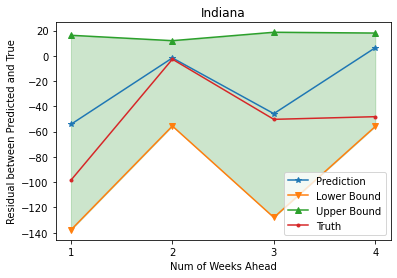

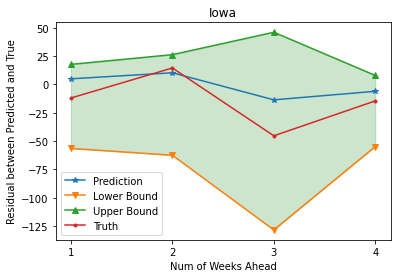

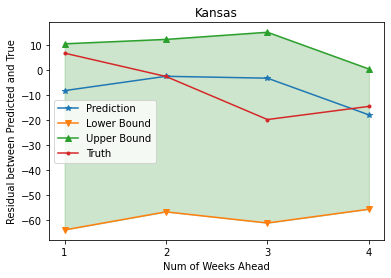

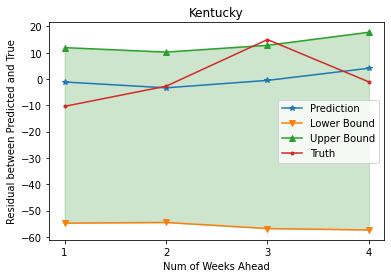

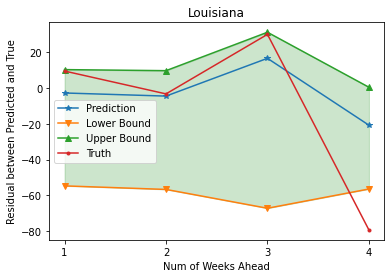

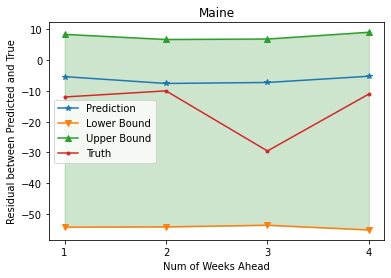

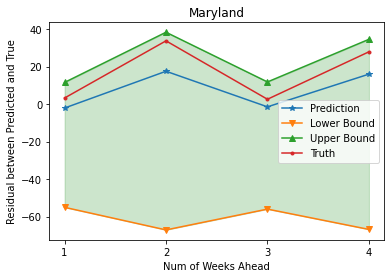

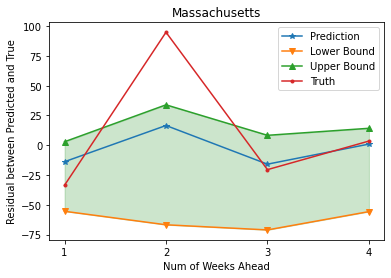

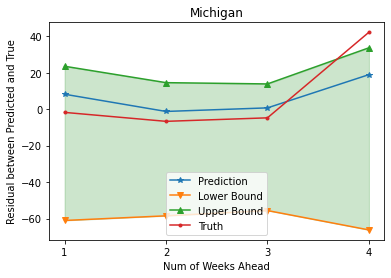

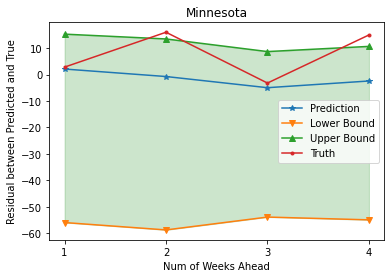

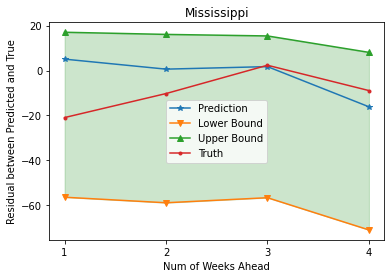

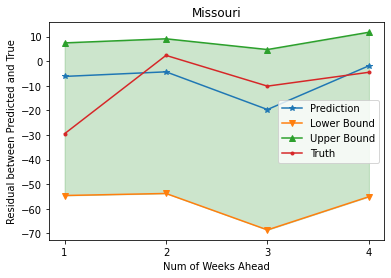

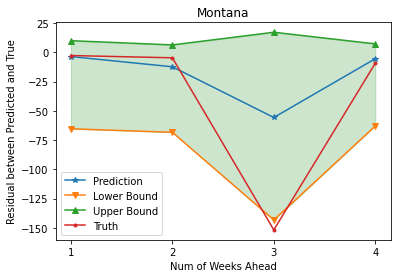

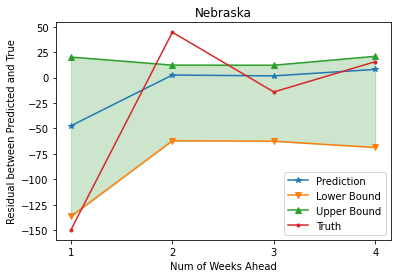

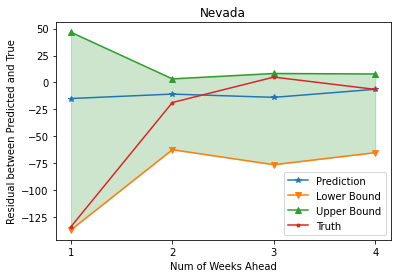

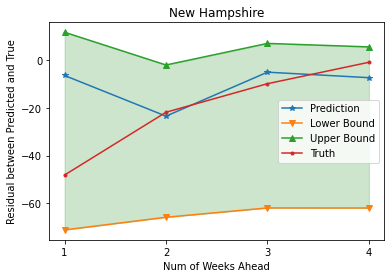

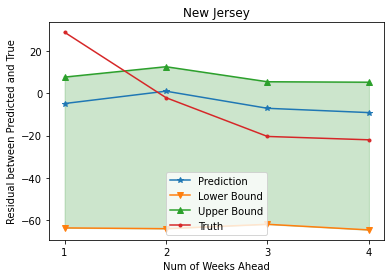

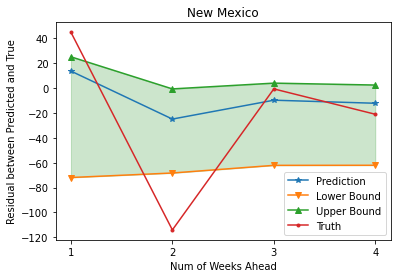

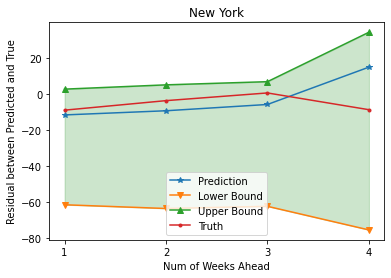

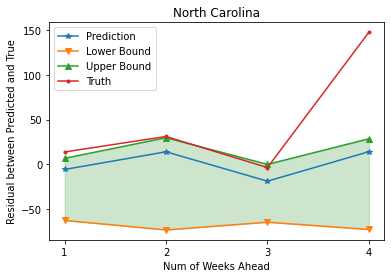

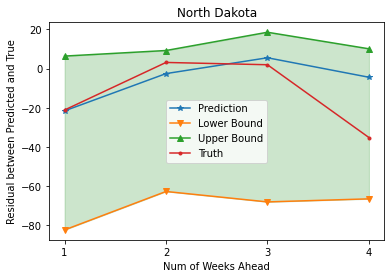

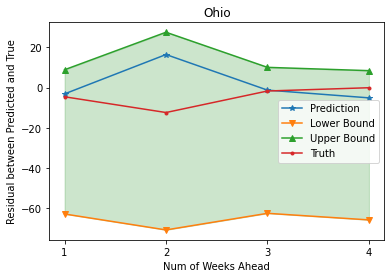

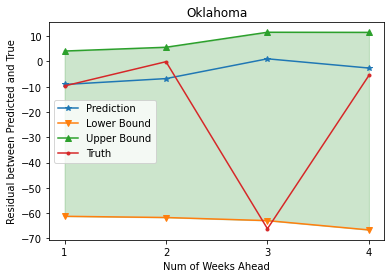

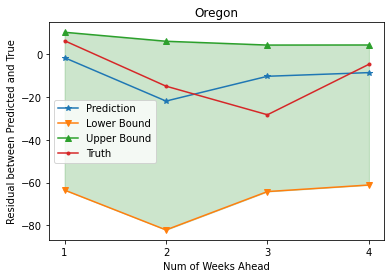

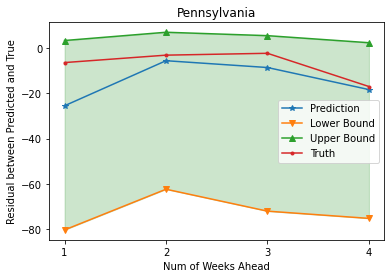

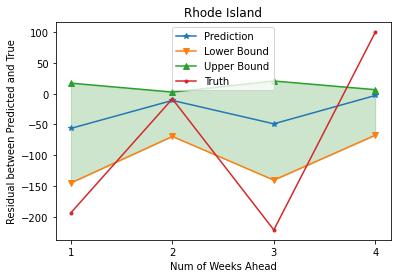

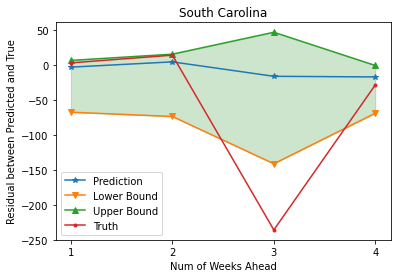

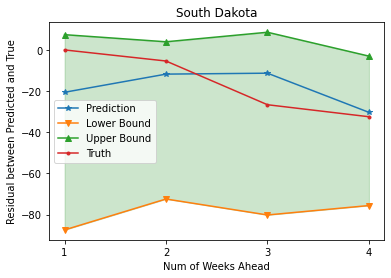

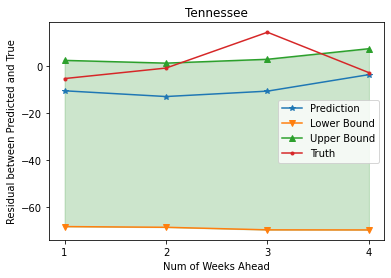

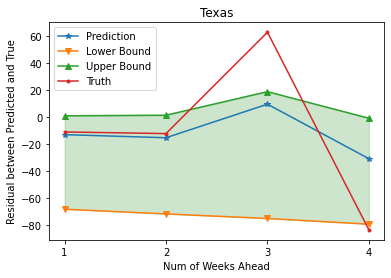

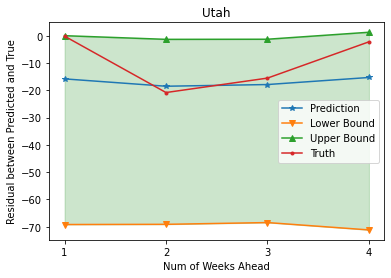

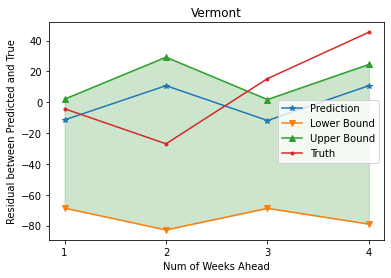

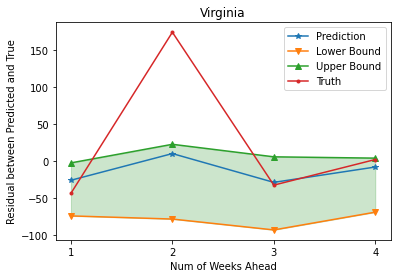

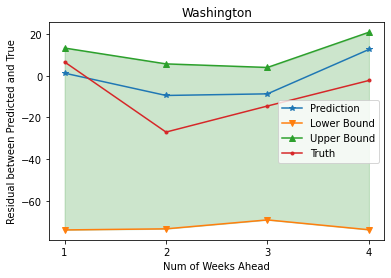

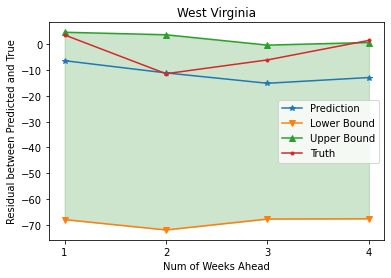

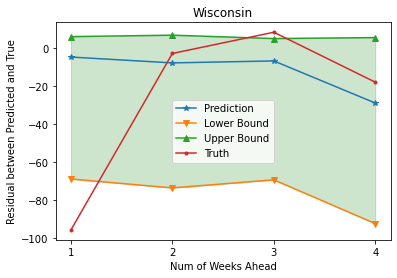

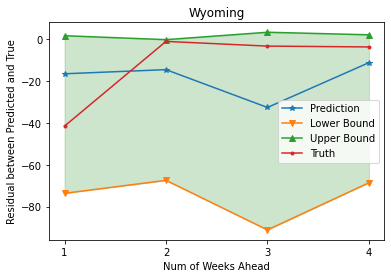

In [14]:
get_plots_quantile("../data/Result_data/plotweek15_unshuffledresult/seed8epo247.npz",0)

In [ ]:
get_plots_quantile("../data/Result_data/plotweek15_unshuffledresult/seed8epo247.npz",1)

In [ ]:
get_plots_quantile("../data/Result_data/plotweek15_unshuffledresult/seed8epo247.npz",2)

In [12]:
np.arange(1,5).astype(str)

array(['1', '2', '3', '4'], dtype='<U21')

#### Shuffled

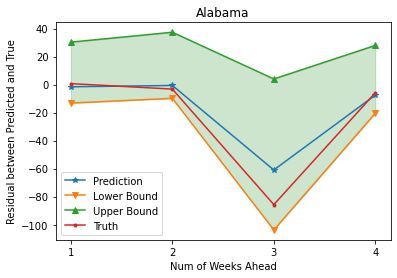

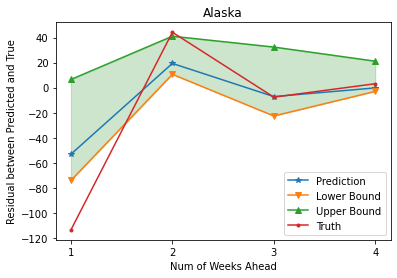

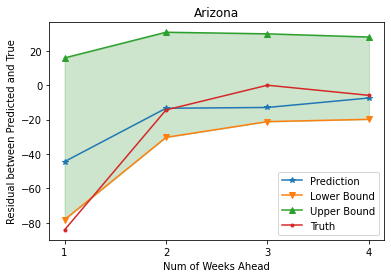

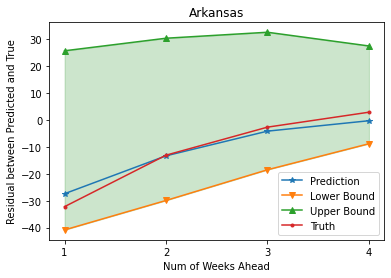

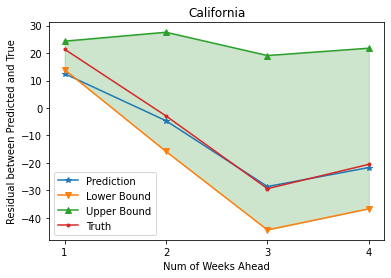

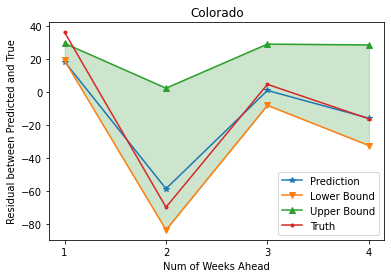

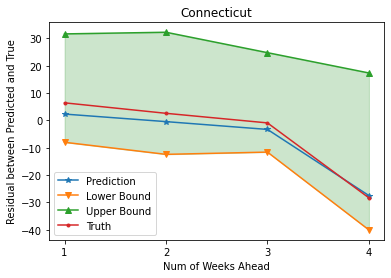

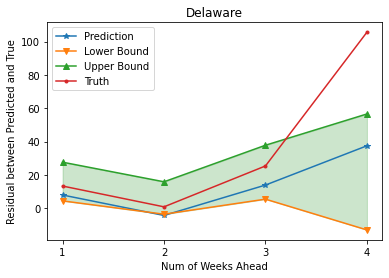

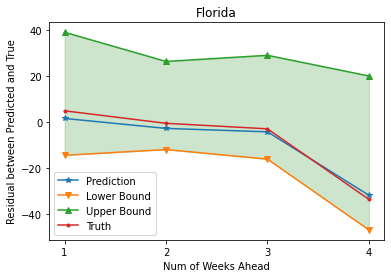

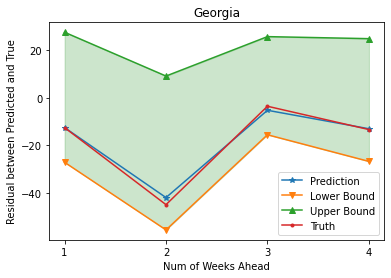

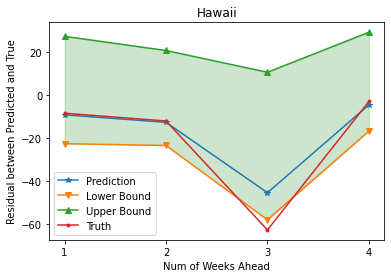

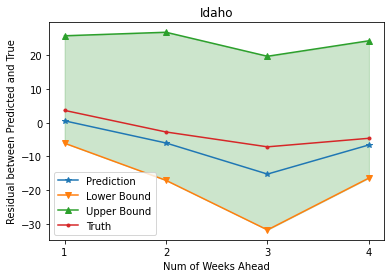

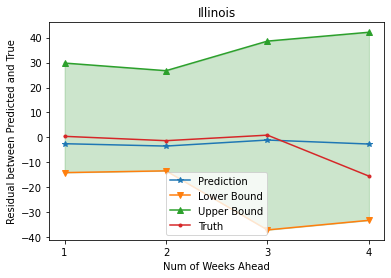

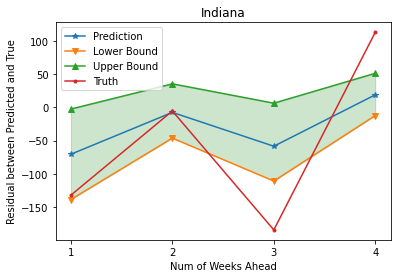

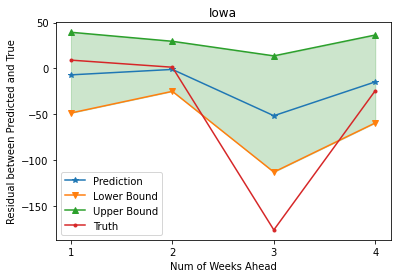

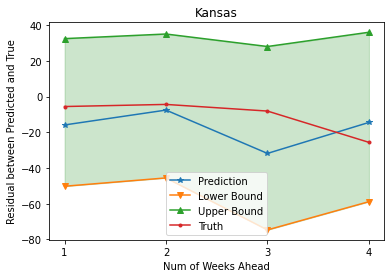

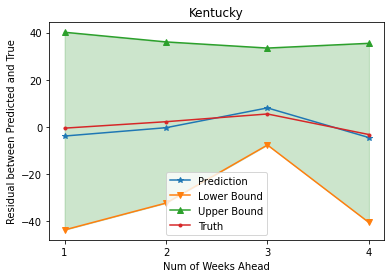

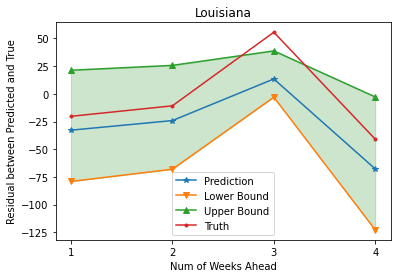

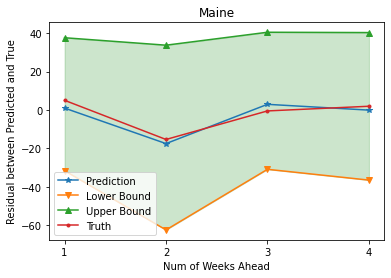

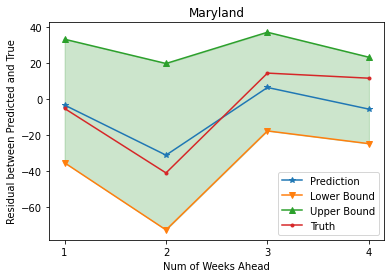

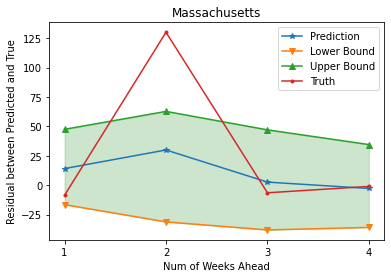

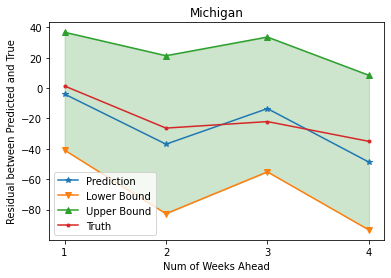

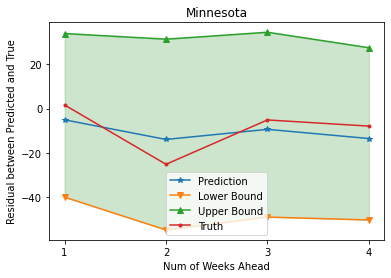

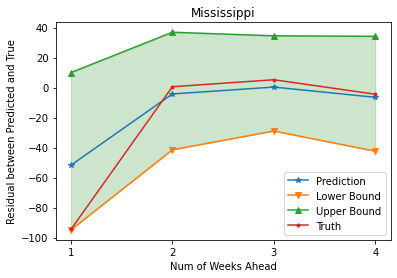

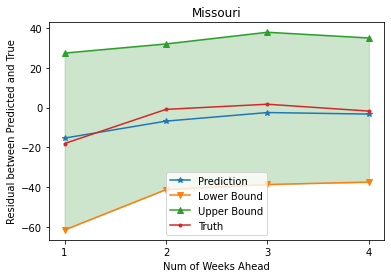

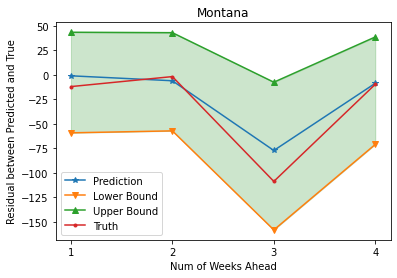

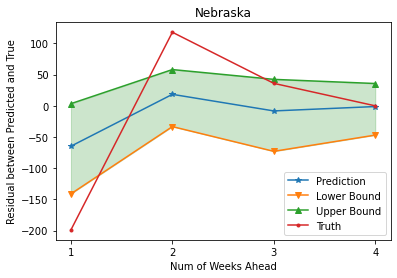

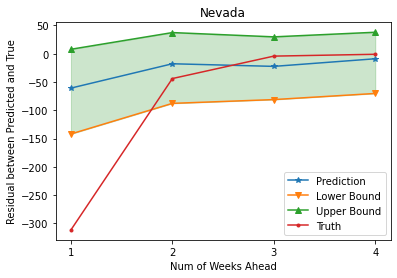

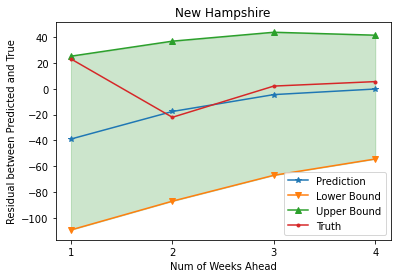

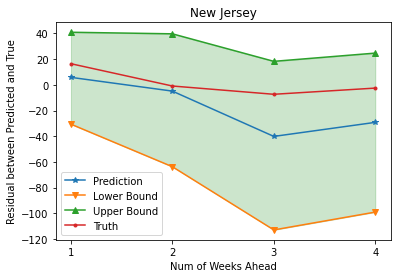

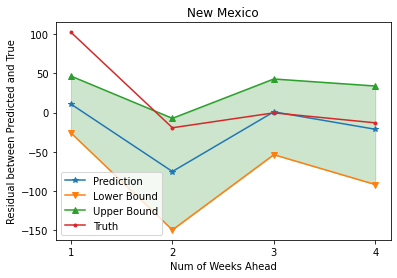

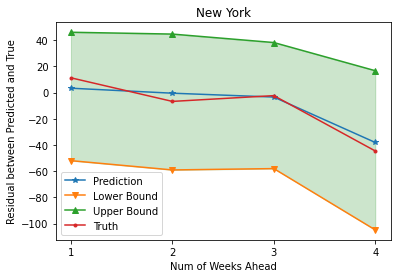

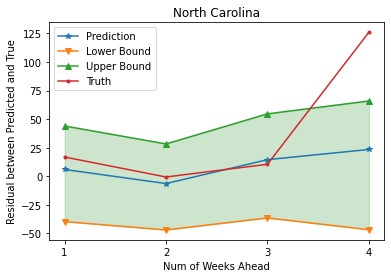

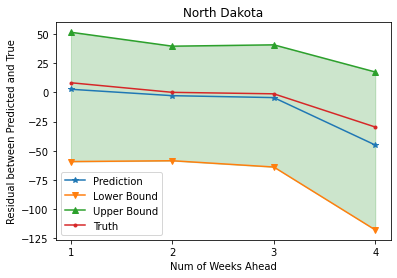

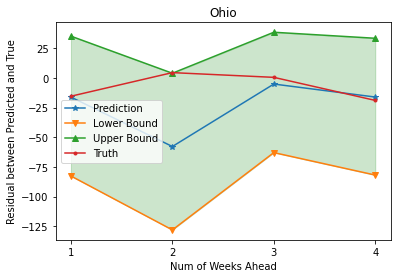

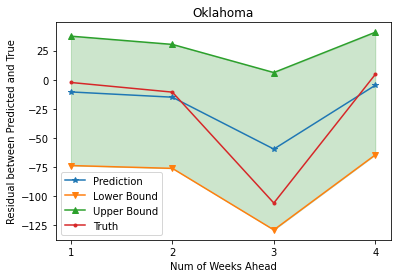

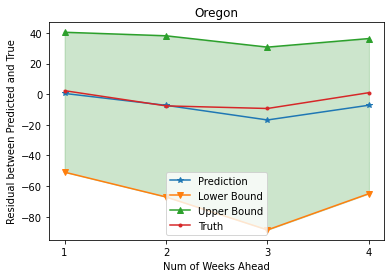

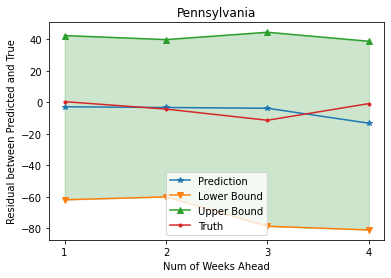

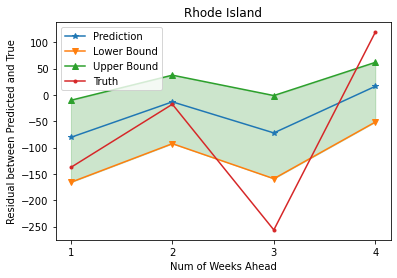

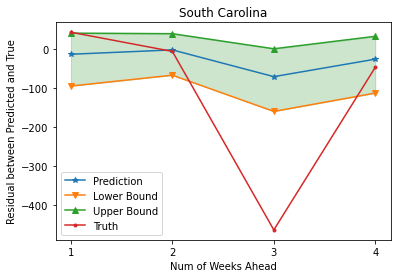

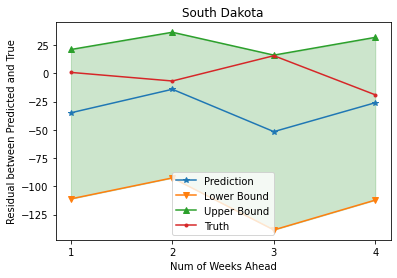

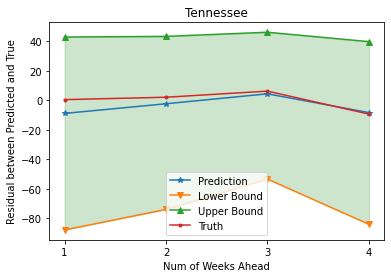

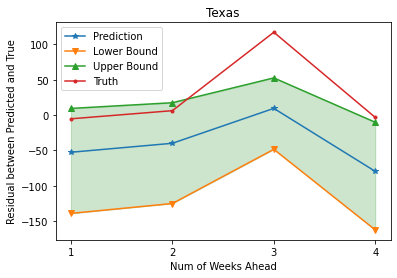

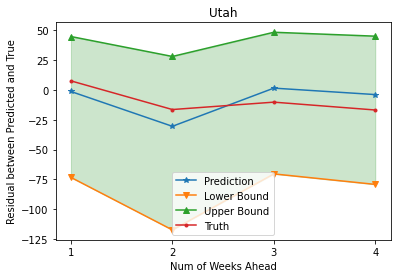

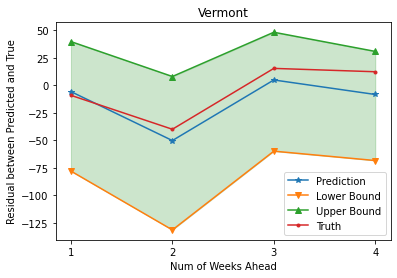

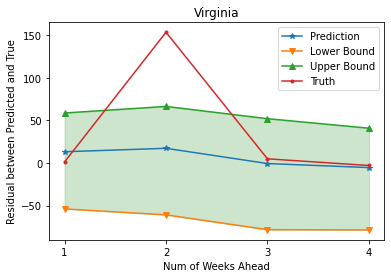

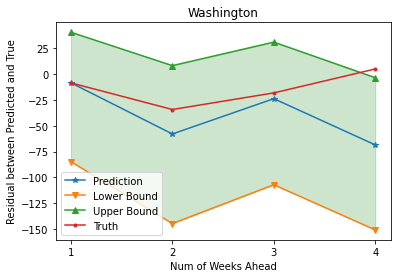

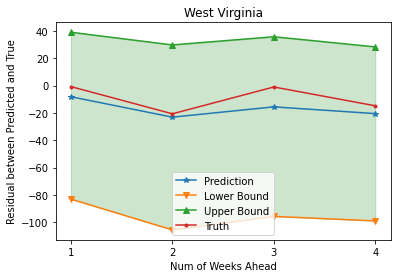

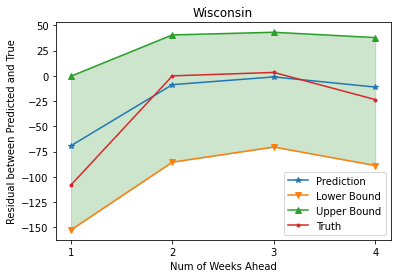

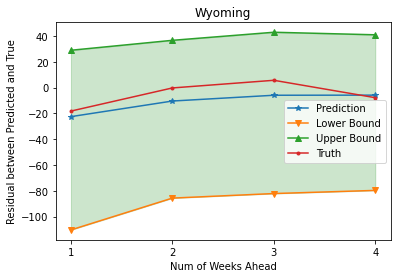

In [15]:
get_plots_quantile("../data/Result_data/plotweek15_shuffledresult/seed1epo269.npz",0)